# Importamos las librerías necesarias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importamos y exploramos los datos

In [ ]:
df = pd.read_csv("/content/APPL_DATA.csv")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100039
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.094820
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.087861
3,1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090035
4,1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.092646


In [ ]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
10559,2022-10-28,157.500000,147.820007,148.199997,155.740005,164762400.0,155.740005
10560,2022-10-31,154.240005,151.919998,153.160004,153.339996,97943200.0,153.339996
10561,2022-11-01,155.449997,149.130005,155.080002,150.649994,80379300.0,150.649994
10562,2022-11-02,152.169998,145.000000,148.949997,145.029999,93436100.0,145.029999
10563,2022-11-03,142.794998,139.259995,142.059998,139.809296,62275031.0,139.809296


In [ ]:
df.set_index("Date",inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100039
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.094820
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.087861
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090035
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.092646


A continuación, creamos una nueva columna dentro del DataFrame la cual contendrá el valor medio de cada medio año. Al observar la gráfica, se pueden apreciar varios outliers visibles, por lo cual enfocarse en la media ayuda para obtener una vista general de cada período.

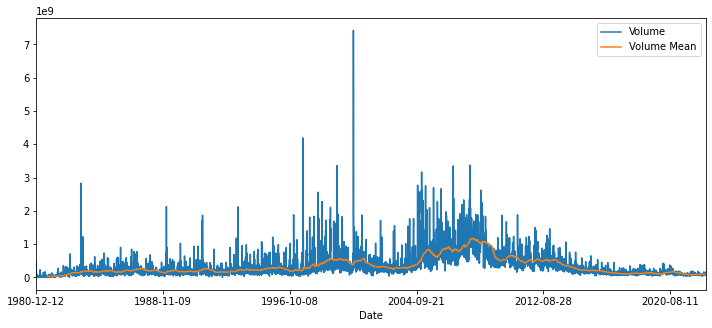

In [ ]:
df['Volume Mean'] = df['Volume'].rolling(window=180).mean()
df[['Volume','Volume Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

Consultamos la función implícita del DataFrame "nlargest()" para obtener los 10 valores más grandes dentro de la columna de Volume además de su índice dentro del DataFrame.

In [ ]:
df['Volume'].nlargest(10)

Date
2000-09-29    7.421641e+09
1997-08-06    4.190480e+09
1997-08-07    3.755438e+09
2008-01-23    3.372970e+09
1999-09-21    3.357558e+09
2007-01-09    3.349298e+09
2005-01-13    3.164717e+09
2007-01-10    2.952880e+09
1983-09-23    2.832346e+09
2004-10-14    2.768427e+09
Name: Volume, dtype: float64

Al parecer, el 29 de Septiembre del 2000 fue una fecha muy importante para la historia de Apple, siendo un día en el cual el precio de la bolsa cayó significativamente.

El efecto que esto tuvo en la compañia fue una venta masiva de productos descontados, lo cual infló de manera artificial el valor de la compañia ante los accionistas.

In [ ]:
df.loc['2000-09-26':'2000-10-02']

,High,Low,Open,Close,Volume,Adj Close,Volume Mean
Date,,,,,,,
2000-09-26,0.977679,0.917411,0.952009,0.918527,2.909368e+08,0.784268,3.815817e+08
2000-09-27,0.941964,0.861607,0.924107,0.873884,4.022592e+08,0.746150,3.813635e+08
2000-09-28,0.960938,0.859375,0.880580,0.955357,9.795856e+08,0.815714,3.813830e+08
2000-09-29,0.517857,0.453125,0.503348,0.459821,7.421641e+09,0.392610,4.168772e+08
2000-10-02,0.477679,0.419643,0.476563,0.433036,2.424789e+09,0.369740,4.281795e+08


# Seleccionamos nuestras variables dependiente e independientes

In [ ]:
X = df.iloc[:,[0,1,2,3,5]] #Valores de Bolsa
Y = df.iloc[:,4] #Volumen de ventas

# Generamos el modelo de predicción

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Después de separar los datos, instanciamos nuestro modelo predicitivo, que en este caso será el de Gaussian Naive Bayes.

Este modelo de clasificación y predicción basado en los teoremas de Naive Bayes usa especulaciones fuertes para generar resultados bastante certeros.

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train)

Corremos la función de score y obtenemos una puntuación bastante buena, por lo que continuamos con las predicciones.

In [ ]:
clf.score(X_train, y_train)

0.9191747915783524

# Construir y analizar predicciones

Creamos una serie de predicciones para ser alojadas en un DataFrame para su graficación.

Estas predicciones usan los valores independientes para generar factores posibles de la bolsa de valores y como estos pueden impactar el volumen neto de ventas que tiene la empresa.

La relación es que conforme un valor importante baje o suba, las ventas fluctuaran para acomodar el valor percebido de la empresa ante el mundo inversionista.

In [ ]:
df_2 = pd.DataFrame(index=["Valor medio de variables","Valor alto de variables","Valor bajo de variables",
                           "Valor de variable 1 bajo","Valor de variable 2 bajo","Valor de variable 3 bajo","Valor de variable 4 bajo",
                           "Valor de variable 5 bajo","Valor de variable 1 alto","Valor de variable 2 alto","Valor de variable 3 alto",
                           "Valor de variable 4 alto","Valor de variable 5 alto"], columns=["High","Low","Open","Close","Adj Close", "Prediction"])

df_2.loc['Valor medio de variables'] = pd.Series({'High':0.5, 'Low':0.5, 'Open':0.5, 'Close':0.5, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.5, 0.5, 0.5, 0.5, 0.5]]))})
df_2.loc['Valor alto de variables'] = pd.Series({'High':0.9, 'Low':0.9, 'Open':0.9, 'Close':0.9, 'Adj Close':0.9, 'Prediction':float(clf.predict([[0.9, 0.9, 0.9, 0.9, 0.9]]))})
df_2.loc['Valor bajo de variables'] = pd.Series({'High':0.2, 'Low':0.2, 'Open':0.2, 'Close':0.2, 'Adj Close':0.2, 'Prediction':float(clf.predict([[0.2, 0.2, 0.2, 0.2, 0.2]]))})
df_2.loc['Valor de variable 1 bajo'] = pd.Series({'High':0.2, 'Low':0.5, 'Open':0.5, 'Close':0.5, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.2, 0.5, 0.5, 0.5, 0.5]]))})
df_2.loc['Valor de variable 2 bajo'] = pd.Series({'High':0.5, 'Low':0.2, 'Open':0.5, 'Close':0.5, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.5, 0.2, 0.5, 0.5, 0.5]]))})
df_2.loc['Valor de variable 3 bajo'] = pd.Series({'High':0.5, 'Low':0.5, 'Open':0.2, 'Close':0.5, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.5, 0.5, 0.2, 0.5, 0.5]]))})
df_2.loc['Valor de variable 4 bajo'] = pd.Series({'High':0.5, 'Low':0.5, 'Open':0.5, 'Close':0.2, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.5, 0.5, 0.5, 0.2, 0.5]]))})
df_2.loc['Valor de variable 5 bajo'] = pd.Series({'High':0.5, 'Low':0.5, 'Open':0.5, 'Close':0.5, 'Adj Close':0.2, 'Prediction':float(clf.predict([[0.5, 0.5, 0.5, 0.5, 0.2]]))})
df_2.loc['Valor de variable 1 alto'] = pd.Series({'High':0.9, 'Low':0.5, 'Open':0.5, 'Close':0.5, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.9, 0.5, 0.5, 0.5, 0.5]]))})
df_2.loc['Valor de variable 2 alto'] = pd.Series({'High':0.5, 'Low':0.9, 'Open':0.5, 'Close':0.5, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.5, 0.9, 0.5, 0.5, 0.5]]))})
df_2.loc['Valor de variable 3 alto'] = pd.Series({'High':0.5, 'Low':0.5, 'Open':0.9, 'Close':0.5, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.5, 0.5, 0.9, 0.5, 0.5]]))})
df_2.loc['Valor de variable 4 alto'] = pd.Series({'High':0.5, 'Low':0.5, 'Open':0.5, 'Close':0.9, 'Adj Close':0.5, 'Prediction':float(clf.predict([[0.5, 0.5, 0.5, 0.9, 0.5]]))})
df_2.loc['Valor de variable 5 alto'] = pd.Series({'High':0.5, 'Low':0.5, 'Open':0.5, 'Close':0.5, 'Adj Close':0.9, 'Prediction':float(clf.predict([[0.5, 0.5, 0.5, 0.5, 0.9]]))})

df_2.head()

,High,Low,Open,Close,Adj Close,Prediction
Valor medio de variables,0.5,0.5,0.5,0.5,0.5,56291200.0
Valor alto de variables,0.9,0.9,0.9,0.9,0.9,225433600.0
Valor bajo de variables,0.2,0.2,0.2,0.2,0.2,180118400.0
Valor de variable 1 bajo,0.2,0.5,0.5,0.5,0.5,218142400.0
Valor de variable 2 bajo,0.5,0.2,0.5,0.5,0.5,218142400.0


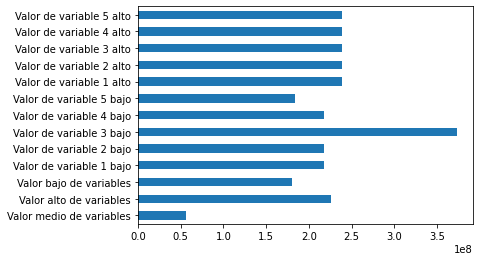

In [ ]:
df_2["Prediction"].plot(kind="barh")